In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
from scipy.io import loadmat

In [48]:
import math

In [49]:
data = loadmat('data/ex3data1.mat')
weights = loadmat('data/ex3weights.mat')

In [50]:
print(data.keys());
print(weights.keys());

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])


In [51]:
X = data['X']
y = data['y']

In [52]:
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [11]:
m, n = X.shape

In [12]:
rand_indices = np.random.choice(m, 100)
sel = X[rand_indices]

In [13]:
import scipy
import matplotlib.cm as cm
from PIL import Image

In [65]:
def display_data(X):
    m, n = X.shape
    width = round(math.sqrt(n))
    height = n // width
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    irow, icol = 0, 0
    pic = np.zeros((height*display_rows, width*display_cols))
    for data in X:
        if icol == display_cols:
            icol = 0
            irow += 1
        img = data.reshape(width, height).T
        pic[irow*height: irow*height + img.shape[0], icol*width: icol*width + img.shape[1]] = img
        icol += 1
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([0, 0, 1, 1])
#     img = Image.fromarray(pic)
    img = scipy.misc.toimage(pic)
    ax.imshow(img, cmap = cm.Greys_r)

/Users/lality/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


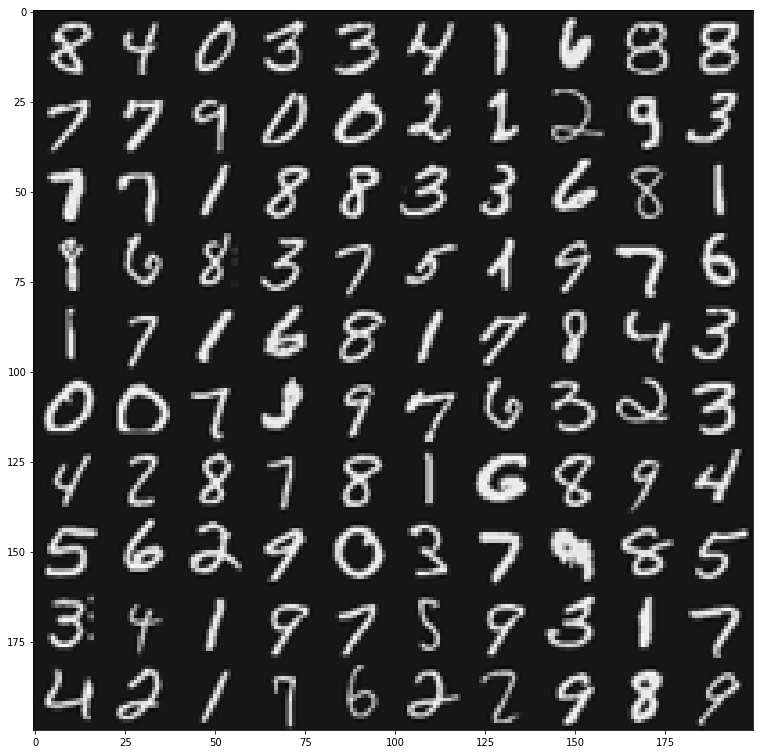

In [66]:
display_data(sel)

In [16]:
sigmoid = lambda z: (1/ (1 + np.exp(-z)))

In [53]:
X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]

In [54]:
print(f'X: {X.shape} (with intercept)')
print(f'y: {y.shape}')

X: (5000, 401) (with intercept)
y: (5000, 1)


In [55]:
print(f'theta1: {theta1.shape}')
print(f'theta2: {theta2.shape}')

theta1: (25, 401)
theta2: (10, 26)


In [18]:
from scipy.optimize import minimize

In [56]:
def lr_cost_function(theta, X, y, lmda):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y) + (lmda/(2*m)) * np.sum(np.square(theta[1:])))
    if np.isnan(J[0]):
        return np.inf
    return J[0]

In [58]:
def lr_gradient_function(theta, X, y, lmda):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1/m) * X.T.dot(h - y) + (lmda/m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]
    return grad.flatten()

In [21]:
# def lr_gradient_function(theta, X, y, lmda):
#     m = y.size
#     h = sigmoid(X.dot(theta.reshape(-1,1)))
      
#     grad = (1/m)*X.T.dot(h-y) + (lmda/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
#     return(grad.flatten())

In [59]:
def one_vs_all(X, y, num_labels, lmda):
    n = X.shape[1]
    initial_theta = np.zeros((n, 1))
    all_theta = np.zeros((num_labels, n))
    for i in np.arange(1, num_labels + 1):
        res = minimize(fun = lr_cost_function, x0 = initial_theta
                                           , args=(X, (y == i) * 1, lmda), jac = lr_gradient_function, options = {'maxiter': 100})
        all_theta[i - 1] = res.x
    return all_theta

In [60]:
lmda = 0.1
theta = one_vs_all(X, y, 10, lmda)

In [61]:
def predict_one_vs_all(theta, features):
    probs = sigmoid(X.dot(theta.T))
    return np.argmax(probs, axis=1) + 1

In [62]:
pred = predict_one_vs_all(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 94.72 %


In [38]:
# Neural Network

In [63]:
def predict(theta1, theta2, X):
    z2 = theta1.dot(X.T)
    a2 = np.c_[np.ones((data['X'].shape[0], 1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    return np.argmax(a3, axis=1) + 1

In [64]:
pred = predict(theta1, theta2, X)
print(f'Traing set accuracy: {np.mean(pred == y.ravel()) * 100}');

Traing set accuracy: 97.52
